In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
from scipy.stats import chi2_contingency


In [2]:
tez=pd.read_excel(r"C:\Users\selen\OneDrive\Masaüstü\Dataset\tez.xlsx")

In [3]:
tez

,Zaman damgası,Cinsiyetiniz ?,Medeni Durumunuz ?,Yaşınız ?,Eğitim Durumunuz ?,Gelir Durumunuz ?,Sosyal Medya Kullanım Süresi (Günde),Elektronik Ticaret Platformlarını Kullanım Süresi (Günde),Aşağıdaki Sosyal ağlardan hangilerine üyesiniz ? (Birden fazla işaretleme yapabilirsiniz.),Aşağıdaki Elektronik Ticaret sitelerinden hangilerine üyesiniz ? (Birden fazla işaretleme yapabilirsiniz.),...,Sosyal Medya ve Elektronik Ticaretin Tüketici Davranışları [Sosyal medya platformlarında alışveriş yapacağım esnada tarafıma indirim kuponu tanımlanması o ürün/hizmeti almam konusunda negatif etki yaratır.],Sosyal Medya ve Elektronik Ticaretin Tüketici Davranışları [Satın almak istediğim ürünün indirimlerinden haberdar olmak için çeşitli sosyal medya platformlarını takip ederim.],Sosyal Medya ve Elektronik Ticaretin Tüketici Davranışları [Satın alacağım ürün veya hizmetin öncesinde firmaların ürünlerini ve fiyatlarını sosyal medya platformlarından incelerim.],Sosyal Medya ve Elektronik Ticaretin Tüketici Davranışları [Satın aldığım ürün/hizmet sonrasında memnun kaldığım takdirde bunu sosyal medya hesaplarımda paylaşırım.],Sosyal Medya ve Elektronik Ticaretin Tüketici Davranışları [Satın aldığım ürün/hizmet sonrasında memnun kalmadığım takdirde bunu sosyal medya hesaplarımda paylaşmam.],Sosyal Medya ve Elektronik Ticaretin Tüketici Davranışları [Satın aldığım/ürün hizmet sonrasında firmanın sosyal medya araçlarında diğer tüketicilerin bilgilenmesi hakkında beğeni veya yorumda bulunurum.],Sosyal Medya ve Elektronik Ticaretin Tüketici Davranışları [Satın alma sonrasında o ürün/hizmet hakkında memnun kalmadığım takdirde diğer tüketicilerin bilgilenmesi hakkında o ürünü almamalarını tavsiye ederim.],Sosyal Medya ve Elektronik Ticaretin Tüketici Davranışları [Satın alımını gerçekleştirdiğim ürün/ hizmet sayfasını takip ederim.],Sosyal Medya ve Elektronik Ticaretin Tüketici Davranışları [Satın alımını gerçekleştirebileceğim firmaların çeşitli sosyal medya platformlarını takip ederim.],"Sosyal Medya ve Elektronik Ticaretin Tüketici Davranışları [Satın aldığım ürün hakkında firmanın çeşitli sosyal medya platformlarında beğeni ve yorum yapar, çevremdeki tüketicilerle paylaşırım.]"
0,2023-04-29 00:14:13.815,Kadın,Bekar,18-24,Lisans,0-5.000 TL,5-7 Saat,1-3 Saat,"Twitter, Instagram, Linkedln, Youtube, Snapchat","Hepsiburada, Trendyol",...,Kesinlikle katılmıyorum,Kesinlikle katılıyorum,Katılıyorum,Kararsızım,Kararsızım,Kararsızım,Katılıyorum,Kararsızım,Katılıyorum,Kararsızım
1,2023-04-29 00:23:24.004,Erkek,Bekar,18-24,Lisans,0-5.000 TL,7+ Saat,0-1 Saat,"Twitter, Facebook, Instagram, Linkedln, Youtube","Hepsiburada, Trendyol, Amazon, N11",...,Kesinlikle katılmıyorum,Kesinlikle katılmıyorum,Kesinlikle katılıyorum,Kesinlikle katılmıyorum,Kesinlikle katılıyorum,Kesinlikle katılmıyorum,Kesinlikle katılmıyorum,Kararsızım,Kararsızım,Katılmıyorum
2,2023-04-29 00:26:21.809,Kadın,Bekar,18-24,Lisans,0-5.000 TL,7+ Saat,1-3 Saat,"Facebook, Instagram, Youtube, Snapchat","Hepsiburada, Trendyol, Amazon, Alibaba, AliExp...",...,Kesinlikle katılmıyorum,Kesinlikle katılıyorum,Kesinlikle katılıyorum,Kesinlikle katılmıyorum,Kesinlikle katılmıyorum,Kesinlikle katılmıyorum,Kesinlikle katılmıyorum,Kesinlikle katılıyorum,Kesinlikle katılıyorum,Kesinlikle katılmıyorum
3,2023-04-29 09:06:40.064,Kadın,Bekar,18-24,Lisans,0-5.000 TL,3-5 Saat,1-3 Saat,"Twitter, Instagram, Linkedln, Youtube, Snapchat","Hepsiburada, Trendyol, Amazon, AliExpress",...,Kararsızım,Kararsızım,Katılıyorum,Kararsızım,Katılıyorum,Katılıyorum,Kesinlikle katılıyorum,Katılıyorum,Katılıyorum,Katılıyorum
4,2023-04-29 10:43:24.780,Kadın,Bekar,18-24,Lisans,0-5.000 TL,5-7 Saat,1-3 Saat,"Twitter, Facebook, Instagram, Linkedln, Youtub...","Hepsiburada, Trendyol, Amazon, N11, AliExpress",...,Kesinlikle katılmıyorum,Kesinlikle katılıyorum,Kesinlikle katılıyorum,Katılmıyorum,Katılmıyorum,Kesinlikle katılıyorum,Kesinlikle katılıyorum,Katılıyorum,Kararsızım,Kararsızım
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [4]:
tez.columns = ['s' + str(i) for i in range(1, len(tez.columns) + 1)]


In [5]:
tez.columns

Index(['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11',
       's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21',
       's22', 's23', 's24', 's25', 's26', 's27', 's28', 's29', 's30', 's31',
       's32', 's33', 's34', 's35', 's36', 's37', 's38', 's39', 's40', 's41',
       's42', 's43', 's44', 's45', 's46', 's47', 's48', 's49', 's50', 's51',
       's52', 's53', 's54', 's55', 's56', 's57', 's58', 's59', 's60'],
      dtype='object')

In [6]:
tez.rename(columns={
    "s1":"s1",
    "s2":"Cinsiyet",
    "s3":"Medeni_Durum",
    "s4":"Yas",
    "s5":"Eğitim",
    "s6":"Gelir",
    "s7":"Sosyal _medya",
    "s8":"Elektronik_ticaret",
    "s9":"Aşağıdaki Sosyal ağlardan hangilerine üyesiniz ?",
    "s10":"Aşağıdaki Elektronik Ticaret sitelerinden hangilerine üyesiniz",
    
},inplace="True")

In [7]:
tez.head(2)

,s1,Cinsiyet,Medeni_Durum,Yas,Eğitim,Gelir,Sosyal _medya,Elektronik_ticaret,Aşağıdaki Sosyal ağlardan hangilerine üyesiniz ?,Aşağıdaki Elektronik Ticaret sitelerinden hangilerine üyesiniz,...,s51,s52,s53,s54,s55,s56,s57,s58,s59,s60
0,2023-04-29 00:14:13.815,Kadın,Bekar,18-24,Lisans,0-5.000 TL,5-7 Saat,1-3 Saat,"Twitter, Instagram, Linkedln, Youtube, Snapchat","Hepsiburada, Trendyol",...,Kesinlikle katılmıyorum,Kesinlikle katılıyorum,Katılıyorum,Kararsızım,Kararsızım,Kararsızım,Katılıyorum,Kararsızım,Katılıyorum,Kararsızım
1,2023-04-29 00:23:24.004,Erkek,Bekar,18-24,Lisans,0-5.000 TL,7+ Saat,0-1 Saat,"Twitter, Facebook, Instagram, Linkedln, Youtube","Hepsiburada, Trendyol, Amazon, N11",...,Kesinlikle katılmıyorum,Kesinlikle katılmıyorum,Kesinlikle katılıyorum,Kesinlikle katılmıyorum,Kesinlikle katılıyorum,Kesinlikle katılmıyorum,Kesinlikle katılmıyorum,Kararsızım,Kararsızım,Katılmıyorum


In [8]:
tez.drop(columns=["s1",],inplace=True)

In [9]:
tez.head(3)

,Cinsiyet,Medeni_Durum,Yas,Eğitim,Gelir,Sosyal _medya,Elektronik_ticaret,Aşağıdaki Sosyal ağlardan hangilerine üyesiniz ?,Aşağıdaki Elektronik Ticaret sitelerinden hangilerine üyesiniz,s11,...,s51,s52,s53,s54,s55,s56,s57,s58,s59,s60
0,Kadın,Bekar,18-24,Lisans,0-5.000 TL,5-7 Saat,1-3 Saat,"Twitter, Instagram, Linkedln, Youtube, Snapchat","Hepsiburada, Trendyol",Kesinlikle katılıyorum,...,Kesinlikle katılmıyorum,Kesinlikle katılıyorum,Katılıyorum,Kararsızım,Kararsızım,Kararsızım,Katılıyorum,Kararsızım,Katılıyorum,Kararsızım
1,Erkek,Bekar,18-24,Lisans,0-5.000 TL,7+ Saat,0-1 Saat,"Twitter, Facebook, Instagram, Linkedln, Youtube","Hepsiburada, Trendyol, Amazon, N11",Kesinlikle katılıyorum,...,Kesinlikle katılmıyorum,Kesinlikle katılmıyorum,Kesinlikle katılıyorum,Kesinlikle katılmıyorum,Kesinlikle katılıyorum,Kesinlikle katılmıyorum,Kesinlikle katılmıyorum,Kararsızım,Kararsızım,Katılmıyorum
2,Kadın,Bekar,18-24,Lisans,0-5.000 TL,7+ Saat,1-3 Saat,"Facebook, Instagram, Youtube, Snapchat","Hepsiburada, Trendyol, Amazon, Alibaba, AliExp...",Kesinlikle katılıyorum,...,Kesinlikle katılmıyorum,Kesinlikle katılıyorum,Kesinlikle katılıyorum,Kesinlikle katılmıyorum,Kesinlikle katılmıyorum,Kesinlikle katılmıyorum,Kesinlikle katılmıyorum,Kesinlikle katılıyorum,Kesinlikle katılıyorum,Kesinlikle katılmıyorum


In [10]:
mapping = {
    'Kesinlikle katılıyorum': 5,
    'Katılıyorum': 4,
    'Kararsızım': 3,
    'Katılmıyorum': 2,
    'Kesinlikle katılmıyorum': 1
}

tez.replace(mapping, inplace=True)

In [11]:
tez.head(2)

,Cinsiyet,Medeni_Durum,Yas,Eğitim,Gelir,Sosyal _medya,Elektronik_ticaret,Aşağıdaki Sosyal ağlardan hangilerine üyesiniz ?,Aşağıdaki Elektronik Ticaret sitelerinden hangilerine üyesiniz,s11,...,s51,s52,s53,s54,s55,s56,s57,s58,s59,s60
0,Kadın,Bekar,18-24,Lisans,0-5.000 TL,5-7 Saat,1-3 Saat,"Twitter, Instagram, Linkedln, Youtube, Snapchat","Hepsiburada, Trendyol",5.0,...,1.0,5.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0
1,Erkek,Bekar,18-24,Lisans,0-5.000 TL,7+ Saat,0-1 Saat,"Twitter, Facebook, Instagram, Linkedln, Youtube","Hepsiburada, Trendyol, Amazon, N11",5.0,...,1.0,1.0,5.0,1.0,5.0,1.0,1.0,3.0,3.0,2.0


In [12]:
tez.loc[:, 's11':'s60'] = tez.loc[:, 's11':'s60'].fillna(3) #boş değerlere "Kararsızım" cevabını verdik.

In [13]:
tez.loc[:, 's11':'s60']=tez.loc[:, 's11':'s60'].astype(int) #istatistiki analizini yapmak için sorulara denbk gelen str değerlerini integer e çevirdik.

In [14]:
tez.dropna(inplace=True) #yas ve sosyal medya sorularında mevcut olan boş değerleri siliyoruz.

In [15]:
tez.head(2)

,Cinsiyet,Medeni_Durum,Yas,Eğitim,Gelir,Sosyal _medya,Elektronik_ticaret,Aşağıdaki Sosyal ağlardan hangilerine üyesiniz ?,Aşağıdaki Elektronik Ticaret sitelerinden hangilerine üyesiniz,s11,...,s51,s52,s53,s54,s55,s56,s57,s58,s59,s60
0,Kadın,Bekar,18-24,Lisans,0-5.000 TL,5-7 Saat,1-3 Saat,"Twitter, Instagram, Linkedln, Youtube, Snapchat","Hepsiburada, Trendyol",5.0,...,1.0,5.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0
1,Erkek,Bekar,18-24,Lisans,0-5.000 TL,7+ Saat,0-1 Saat,"Twitter, Facebook, Instagram, Linkedln, Youtube","Hepsiburada, Trendyol, Amazon, N11",5.0,...,1.0,1.0,5.0,1.0,5.0,1.0,1.0,3.0,3.0,2.0


Gelir durumuna göre dağılımlar

In [16]:
yas_gelir_frekansi = tez.groupby('Yas')['Gelir'].value_counts().reset_index()
siralama_düzeni_gelir=["0-5.000 TL","5.001-8.500 TL","8.501-13.500 TL","13.501-18.500 TL","18.501+ TL"]
yas_gelir_frekansi["Gelir"]=yas_gelir_frekansi["Gelir"].astype(CategoricalDtype(categories=siralama_düzeni_gelir,ordered=True))

In [17]:
yas_gelir_frekansi=yas_gelir_frekansi.sort_values(by="Gelir")
yas_gelir_frekansi

,Yas,Gelir,count
0,18-24,0-5.000 TL,18
9,25-34,0-5.000 TL,2
2,18-24,5.001-8.500 TL,6
7,25-34,5.001-8.500 TL,4
13,35-50,5.001-8.500 TL,1
1,18-24,8.501-13.500 TL,10
5,25-34,8.501-13.500 TL,6
10,35-50,8.501-13.500 TL,4
4,18-24,13.501-18.500 TL,3
6,25-34,13.501-18.500 TL,5


([0], [Text(0, 0, '13.501-18.500 TL')])

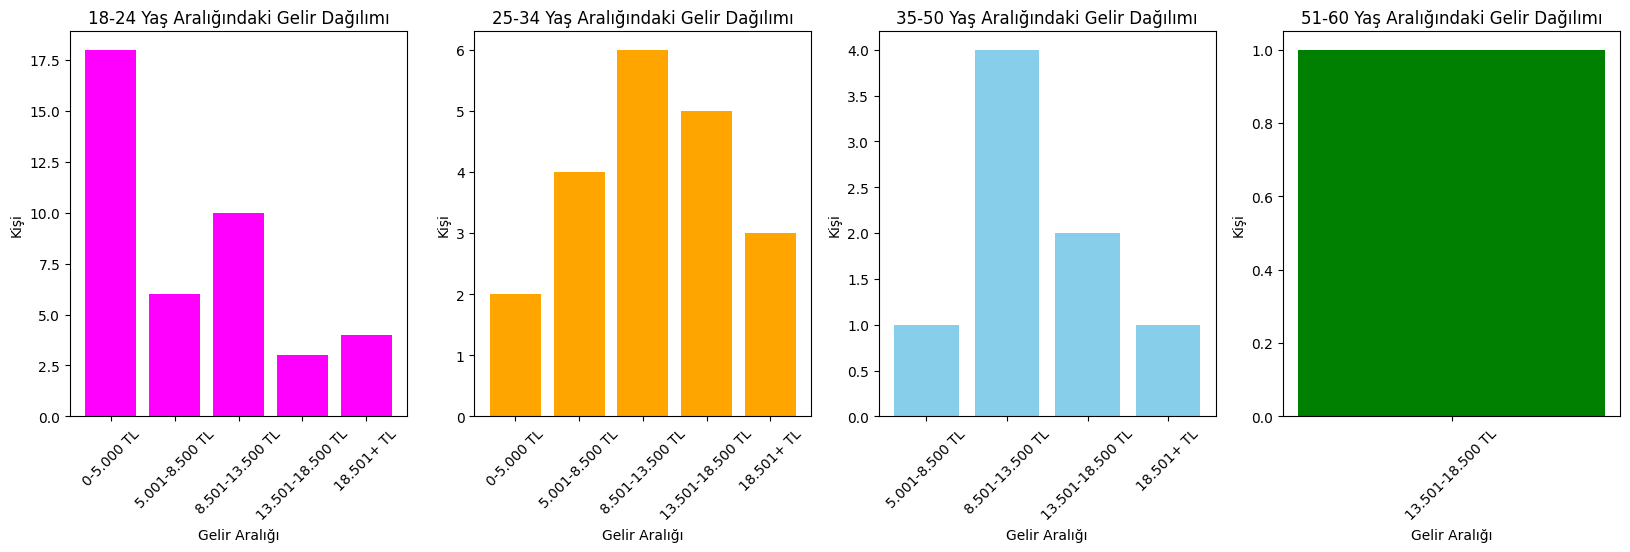

In [18]:

df_18_24 = yas_gelir_frekansi[yas_gelir_frekansi["Yas"] == "18-24"]
df_25_34 = yas_gelir_frekansi[yas_gelir_frekansi["Yas"] == "25-34"]
df_35_50 = yas_gelir_frekansi[yas_gelir_frekansi["Yas"] == "35-50"]
df_51_60 = yas_gelir_frekansi[yas_gelir_frekansi["Yas"] == "51-60"]


plt.figure(figsize=(20,5))


#-----------------------------------
plt.subplot(1, 4, 1)
plt.bar(df_18_24["Gelir"], df_18_24["count"],color="magenta")
plt.title("18-24 Yaş Aralığındaki Gelir Dağılımı")
plt.xlabel("Gelir Aralığı")
plt.ylabel("Kişi")
plt.xticks(rotation=45)

#-----------------------------------
plt.subplot(1, 4, 2)
plt.bar(df_25_34["Gelir"], df_25_34["count"],color="orange")
plt.title("25-34 Yaş Aralığındaki Gelir Dağılımı")
plt.xlabel("Gelir Aralığı")
plt.ylabel("Kişi")
plt.xticks(rotation=45)

#-----------------------------------
plt.subplot(1, 4, 3)
plt.bar(df_35_50["Gelir"], df_35_50["count"],color="skyblue")
plt.title("35-50 Yaş Aralığındaki Gelir Dağılımı")
plt.xlabel("Gelir Aralığı")
plt.ylabel("Kişi")
plt.xticks(rotation=45)

#-----------------------------------
plt.subplot(1, 4, 4)
plt.bar(df_51_60["Gelir"], df_51_60["count"],color="green")
plt.title("51-60 Yaş Aralığındaki Gelir Dağılımı")
plt.xlabel("Gelir Aralığı")
plt.ylabel("Kişi")
plt.xticks(rotation=45)

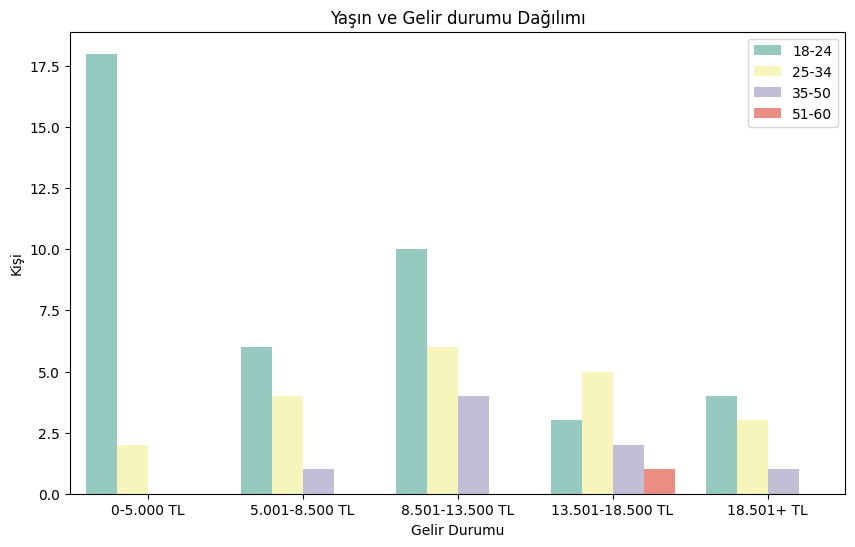

In [19]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='Gelir', y='count', hue='Yas', data=yas_gelir_frekansi, palette='Set3')
plt.xlabel('Gelir Durumu')
plt.ylabel('Kişi')
plt.title('Yaşın ve Gelir durumu Dağılımı')
plt.legend(loc="upper right")
plt.show()

In [20]:
cins_gelir=tez.groupby("Gelir")["Cinsiyet"].value_counts().reset_index()
cins_gelir

,Gelir,Cinsiyet,count
0,0-5.000 TL,Kadın,13
1,0-5.000 TL,Erkek,7
2,13.501-18.500 TL,Erkek,8
3,13.501-18.500 TL,Kadın,3
4,18.501+ TL,Erkek,6
5,18.501+ TL,Kadın,2
6,5.001-8.500 TL,Erkek,7
7,5.001-8.500 TL,Kadın,4
8,8.501-13.500 TL,Kadın,15
9,8.501-13.500 TL,Erkek,5


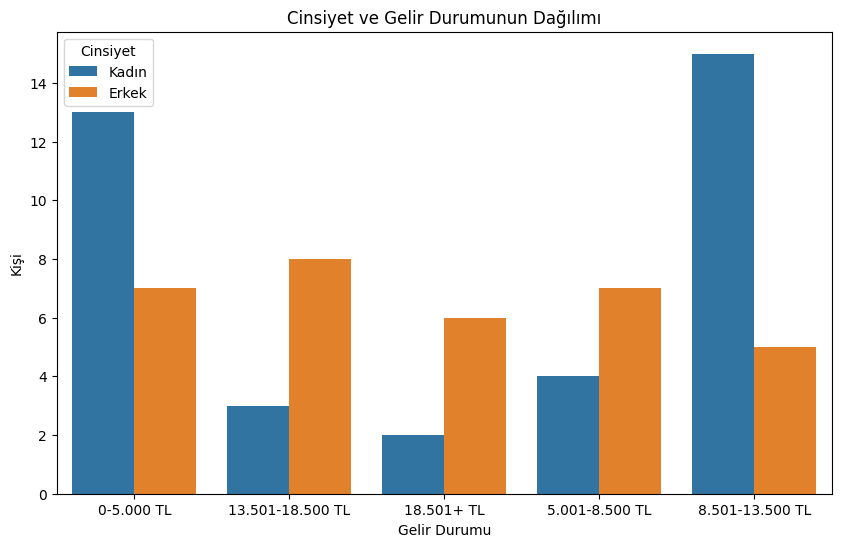

In [21]:
plt.figure(figsize=(10,6))

sns.barplot(x=cins_gelir["Gelir"],y=cins_gelir["count"],hue=cins_gelir["Cinsiyet"])
plt.xlabel("Gelir Durumu")
plt.ylabel("Kişi")
plt.title("Cinsiyet ve Gelir Durumunun Dağılımı")
plt.show()

In [22]:
tez.head(2)

,Cinsiyet,Medeni_Durum,Yas,Eğitim,Gelir,Sosyal _medya,Elektronik_ticaret,Aşağıdaki Sosyal ağlardan hangilerine üyesiniz ?,Aşağıdaki Elektronik Ticaret sitelerinden hangilerine üyesiniz,s11,...,s51,s52,s53,s54,s55,s56,s57,s58,s59,s60
0,Kadın,Bekar,18-24,Lisans,0-5.000 TL,5-7 Saat,1-3 Saat,"Twitter, Instagram, Linkedln, Youtube, Snapchat","Hepsiburada, Trendyol",5.0,...,1.0,5.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0
1,Erkek,Bekar,18-24,Lisans,0-5.000 TL,7+ Saat,0-1 Saat,"Twitter, Facebook, Instagram, Linkedln, Youtube","Hepsiburada, Trendyol, Amazon, N11",5.0,...,1.0,1.0,5.0,1.0,5.0,1.0,1.0,3.0,3.0,2.0


Eğitim durumuna göre dağılımlar

In [23]:
cins_eg=tez.groupby("Cinsiyet")["Eğitim"].value_counts().reset_index()
siralama_duzeni_egitim = ['İlkokul', 'Ortaokul', 'Lise', 'Ön Lisans', 'Lisans', 'Yüksek Lisans', 'Doktora']
cins_eg['Eğitim'] = cins_eg['Eğitim'].astype(CategoricalDtype(categories=siralama_duzeni_egitim, ordered=True))

In [24]:
cins_eg= cins_eg.sort_values(by='Eğitim')

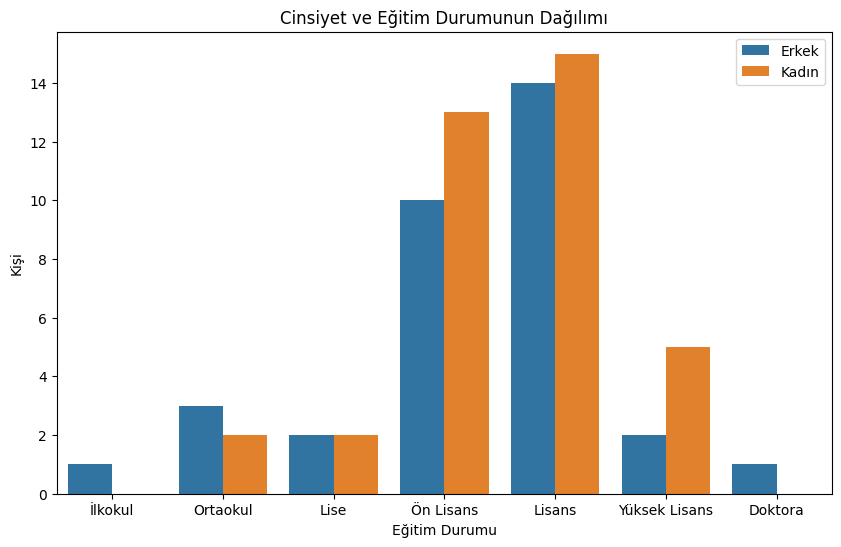

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x="Eğitim",y="count",hue="Cinsiyet",data=cins_eg)
plt.legend(loc="upper right")
plt.xlabel("Eğitim Durumu")
plt.ylabel("Kişi")
plt.title("Cinsiyet ve Eğitim Durumunun Dağılımı")
plt.show()

In [26]:
medeni_eg=tez.groupby("Medeni_Durum")["Eğitim"].value_counts().reset_index()
medeni_eg['Eğitim'] = medeni_eg['Eğitim'].astype(CategoricalDtype(categories=siralama_duzeni_egitim, ordered=True))
medeni_eg=medeni_eg.sort_values(by="Eğitim")
medeni_eg

,Medeni_Durum,Eğitim,count
11,Evli,İlkokul,1
2,Bekar,Ortaokul,4
10,Evli,Ortaokul,1
5,Bekar,Lise,1
9,Evli,Lise,3
1,Bekar,Ön Lisans,18
7,Evli,Ön Lisans,5
0,Bekar,Lisans,26
8,Evli,Lisans,3
3,Bekar,Yüksek Lisans,2


<Axes: xlabel='Eğitim', ylabel='count'>

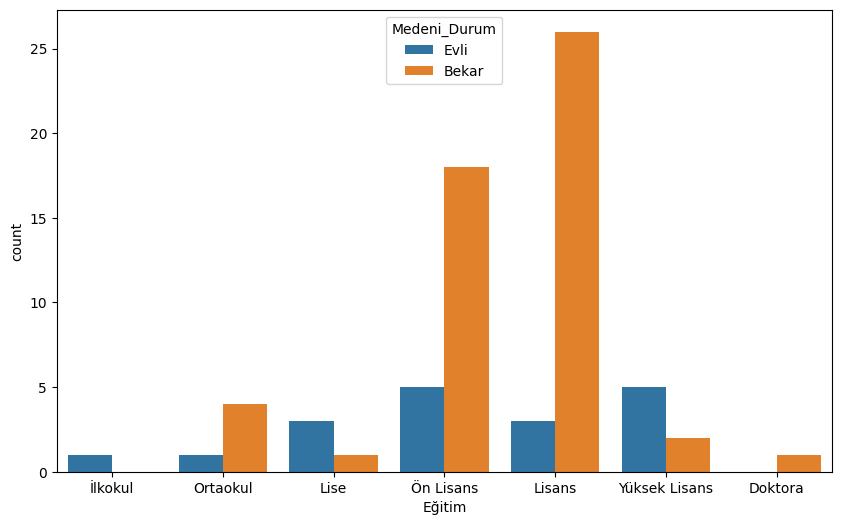

In [27]:
plt.figure(figsize=(10,6))

sns.barplot(x="Eğitim",y="count",hue="Medeni_Durum",data=medeni_eg)


Cinsiyete göre Dağılımlar

In [28]:
cins_medeni=tez.groupby("Cinsiyet")["Medeni_Durum"].value_counts().reset_index()
cins_medeni

,Cinsiyet,Medeni_Durum,count
0,Erkek,Bekar,29
1,Erkek,Evli,4
2,Kadın,Bekar,23
3,Kadın,Evli,14


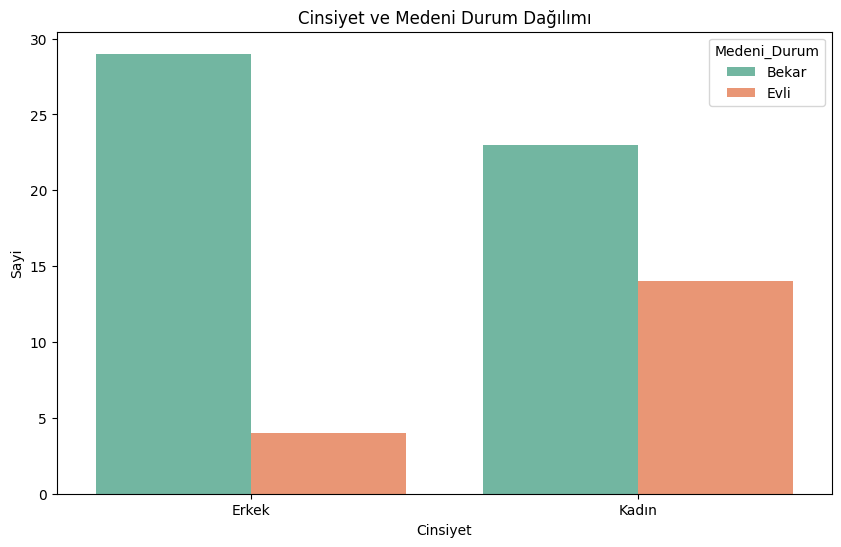

In [29]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Cinsiyet', y='count', hue='Medeni_Durum', data=cins_medeni, palette='Set2')
plt.xlabel('Cinsiyet')
plt.ylabel('Sayi')
plt.title('Cinsiyet ve Medeni Durum Dağılımı')
plt.show()

In [30]:
cins_yas=tez.groupby("Cinsiyet")["Yas"].value_counts().reset_index()
cins_yas

,Cinsiyet,Yas,count
0,Erkek,18-24,22
1,Erkek,25-34,9
2,Erkek,35-50,2
3,Kadın,18-24,19
4,Kadın,25-34,11
5,Kadın,35-50,6
6,Kadın,51-60,1


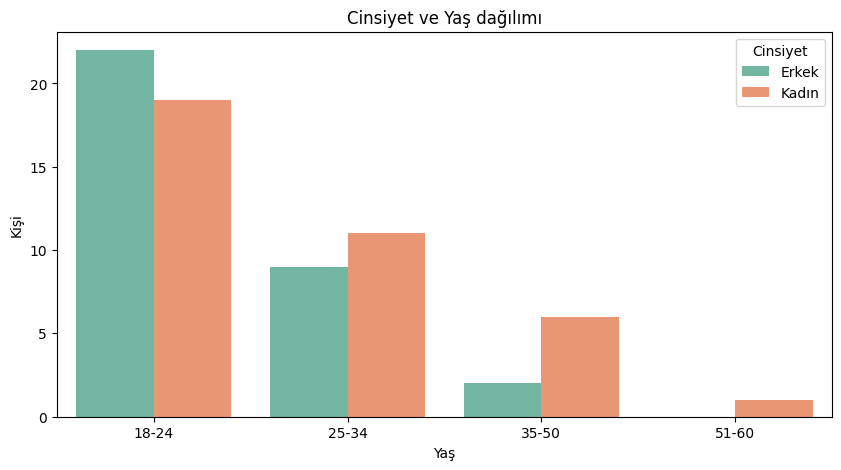

In [31]:
plt.figure(figsize=(10,5))

sns.barplot(x=cins_yas["Yas"],y=cins_yas["count"],hue=cins_yas["Cinsiyet"],palette="Set2")
plt.xlabel("Yaş")
plt.ylabel("Kişi")
plt.title("Cinsiyet ve Yaş dağılımı")
plt.show()

In [32]:
#####

0     1.0
1     3.0
2     1.0
3     1.0
4     5.0
     ... 
65    3.0
66    3.0
67    3.0
68    1.0
69    5.0
Name: s60, Length: 70, dtype: float64

In [71]:
chi2, p, _, _ = chi2_contingency(pd.crosstab(tez['Cinsiyet'], [tez['s34'], tez['s35'], tez["s36"],tez["s37"], tez['s38'],tez["s39"],tez["s40"],tez["s41"],
                                                               tez["s42"],tez["s43"]]))


In [84]:
chi2, p, _, _

(52.30889980889982,
 0.5010129459251773,
 array([[1.41428571, 0.47142857, 0.47142857, 0.47142857, 0.47142857,
         0.47142857, 0.47142857, 0.47142857, 0.47142857, 0.47142857,
         0.47142857, 0.47142857, 0.47142857, 0.47142857, 2.35714286,
         0.47142857, 0.47142857, 0.47142857, 0.47142857, 0.47142857,
         0.47142857, 0.47142857, 0.94285714, 0.47142857, 0.47142857,
         0.47142857, 0.47142857, 0.47142857, 0.47142857, 0.47142857,
         0.47142857, 0.47142857, 3.77142857, 0.47142857, 0.47142857,
         0.47142857, 0.47142857, 0.47142857, 0.47142857, 0.47142857,
         0.47142857, 0.47142857, 0.47142857, 0.47142857, 0.47142857,
         0.47142857, 0.47142857, 0.47142857, 0.47142857, 0.47142857,
         0.47142857, 0.47142857, 0.47142857, 1.41428571],
        [1.58571429, 0.52857143, 0.52857143, 0.52857143, 0.52857143,
         0.52857143, 0.52857143, 0.52857143, 0.52857143, 0.52857143,
         0.52857143, 0.52857143, 0.52857143, 0.52857143, 2.64285714,
    

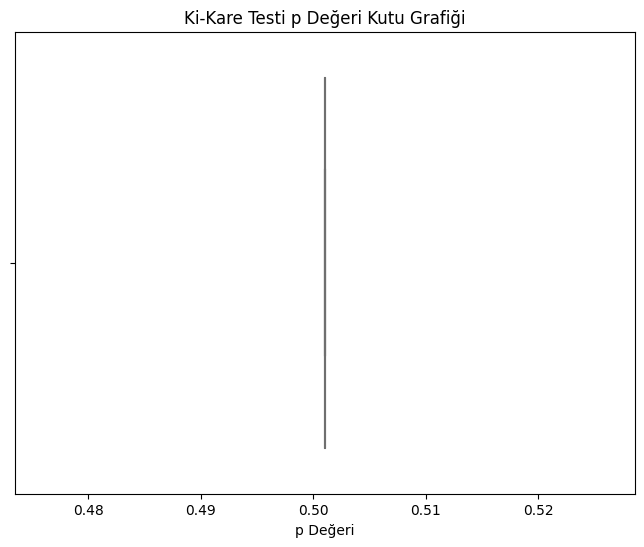

In [83]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=[p], color='skyblue')
plt.xlabel('p Değeri')
plt.title('Ki-Kare Testi p Değeri Kutu Grafiği')
plt.show()